# FIRST OPERATION FORM

## Heat balance for the oven 1

![title](formulas/oven12.png)

### Heat released by propane "Hin"

In [1]:
Hin_oven1=23.44 #kW
print('Hin_oven1=',"%.4f"% Hin_oven1 ,'kW')

Hin_oven1= 23.4400 kW


### Air volumetric flow

![title](formulas/volumetrico1.png)

In [2]:
p_atm=101.325 # Atmospheric pressure of furnace's location kPa PENDING
R_air= 0.287 # kPa*m^3/kg*K
T_freshair= 25+273 # K
d_air= p_atm/(R_air*(T_freshair)) # kg/m^3
print ('density of air=',"%.4f"% d_air ,'kg/m^3')

density of air= 1.1847 kg/m^3


In [3]:
import numpy as np
pi=np.pi
Ac1= (pi*((1.5)*.0254)**2)/4 # Diameter 1.5 was given in inches
print ('Transversal area of the tube=',"%.4f"% Ac1 ,'m^2')

Transversal area of the tube= 0.0011 m^2


They give us a value between 180-222 m^3/h, we don't know how they calculated it, but in the next code cell we can calculate the air volumetric flow if we use a pitot's tube working with water, only we introduced values to obtain an aporoximated value of 222 m^3/h

In [4]:
h= 6.9*.0254 #pulg-->m INVENTED VALUE
Vel_air=((2*9.81*h*1000)/d_air)**.5 # m/s
print ('Velocity of air=',"%.4f"% Vel_air ,'m/s')
Vflow= Vel_air*Ac1 #m^3/s
print ('Air volumetric flow=',"%.4f"% Vflow ,'m^3/s')
print ('Air volumetric flow=',"%.4f"% float(Vflow*3600) ,'m^3/h')

Velocity of air= 53.8743 m/s
Air volumetric flow= 0.0614 m^3/s
Air volumetric flow= 221.1180 m^3/h


### Heat recovered by the exchanger "Hre"

![title](formulas/hrepoints1.png)

In the next heat formulas Hre, Hoff and Hexhaust, the first part (Patm/Rair*Taverage), we are using the average temperature, but we don't know if that is the correctly way to calculate the density of air, may be exists other way to calculate it.

![title](formulas/hre12.png)

In [5]:
Patm= 101.325 # Atmospheric pressure of furnace's location kPa PENDING
R_air= 0.287 # kPa m^3/ kg K
T_freshair= 25+273 # K
Cp_re= 1.007  # Cp@25°C kJ/kg*K
T_preheatedair= 165+273   # Temperature of heated air MEASURED
T_average_re=(T_freshair+T_preheatedair)/2 # K
Heat_re= (Patm/(R_air*T_average_re))*Vflow*Cp_re*(T_preheatedair-T_freshair)
print('Hre=',"%.4f"% Heat_re, 'kW')

Hre= 8.3074 kW


### Heat lost by the exhaust air in the beginning of the stack "Hoff"

![title](formulas/exhaust12.png)

![title](formulas/hoff11.png)

In [6]:
Cp_off= 1.135  #Cp@700°C kJ/kg*K
T_insideoven= 720+273  # Temperature of air inside the oven INVENTED
T_average_off=(T_insideoven+T_freshair)/2 # K
Heat_off= (Patm/(R_air*T_average_off))*Vflow*Cp_off*(T_insideoven-T_freshair)
print('Hoff= ', "%.4f"%Heat_off, 'kW')

Hoff=  26.4997 kW


### Heat lost by the exhaust air in the end of the stack "Hexhaust"

![title](formulas/exhaust11.png)

![title](formulas/hexhaust11.png)

In [7]:
Cp_exhaust= 1.056  #Cp@350°C kJ/kg*K
T_exhaust= 370+273  # Temperature of exhaust air MEASURED
T_average_exhaust=(T_exhaust+T_freshair)/2 # K
Heat_exhaust= (Patm/(R_air*T_average_exhaust))*Vflow*Cp_exhaust*(T_exhaust-T_freshair)
print('Hexhaust= ',"%.4f"% Heat_exhaust, 'kW')

Hexhaust=  16.7911 kW


### Heat lost through the stack's walls "Hwx"

![title](formulas/exhaust14.png)

![title](formulas/hoff12.png)

Hwx is calculated by heat balancing

![title](formulas/wstack1.png)

In [8]:
Heat_wx= Heat_off-Heat_re-Heat_exhaust
print('Hwx= ',"%.4f"% Heat_wx, 'kW')

Hwx=  1.4011 kW


### Heat lost through the walls in contact with the air inside the oven

![title](formulas/walloven12.png)

In [9]:
Kfc= 0.21 # W/m*K SEARCHING IN THE WEB
Klr= 0.76 # W/m*K SEARCHING IN THE WEB
Kac= 58 # W/m*K SEARCHING IN THE WEB
fc=.0254**2 # Conversion factor in^2-->m^2
Tsi9=1500 # INVENTED
Tso9=130 # MEASURED
Tsi10=1500 #INVENTED
Tso10=130 #MEASURED
Tsi11=1500 #INVENTED
Tso11=130 #MEASURED
Tsi12=1500 #INVENTED
Tso12=130 #MEASURED
A9=12*24*fc # m^2
A10=24*45.5*fc # m^2
A11=12*45.5*fc # m^2
A12=12*45.5*fc # m^2

Heat_Wall3= (((Tsi9-Tso9)/(2/(Kfc*A9)+2/(Kfc*A9))+(Tsi10-Tso10)/(9/(Klr*A10)+2.5/(Kfc*A10)+4/(Kac*A10)) \
        +(Tsi11-Tso11)/(9/(Klr*A11)+2.5/(Kfc*A11)+4/(Kac*A11))+(Tsi12-Tso12)/(9/(Klr*A12)+2.5/(Kfc*A12)+4/(Kac*A12)))*(1/.0254))/1000
print('Hwall=',"%.4f"%Heat_Wall3, 'kW')


Hwall= 3.7173 kW


### Heat lost through the walls in contact with the melted glass inside the oven

![title](formulas/mgoven12.png)

In [10]:
Tmg=1100 # THIS VALUES WAS GIVEN
Tso13=120 # MEASURED
Tso14=120 #MEASURED
Tso15=120 #MEASURED
Tso16=120 #MEASURED
A13=12*12*fc
A14=24*12*fc
A15=12*12*fc
A16=12*24*fc

Heat_Wall4= (((Tmg-Tso13)/(9/(Klr*A13)+2.5/(Kfc*A13)+4/(Kac*A13))+(Tmg-Tso14)/(9/(Klr*A14)+2.5/(Kfc*A14)+4/(Kac*A14)) \
        +(Tmg-Tso15)/(9/(Klr*A15)+2.5/(Kfc*A15)+4/(Kac*A15))+(Tmg-Tso16)/(2.5/(Klr*A16)+1/(Kfc*A16)))*(1/.0254))/1000
print('Hmg=', "%.4f"%Heat_Wall4, 'kW')

Hmg= 1.4924 kW


In [11]:
Heat_Wall3+Heat_Wall4+Heat_off-Hin_oven1-Heat_re

-0.03806158021538231

### Sankey diagram of the heat flows

In [12]:
#%matplotlib notebook
import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey

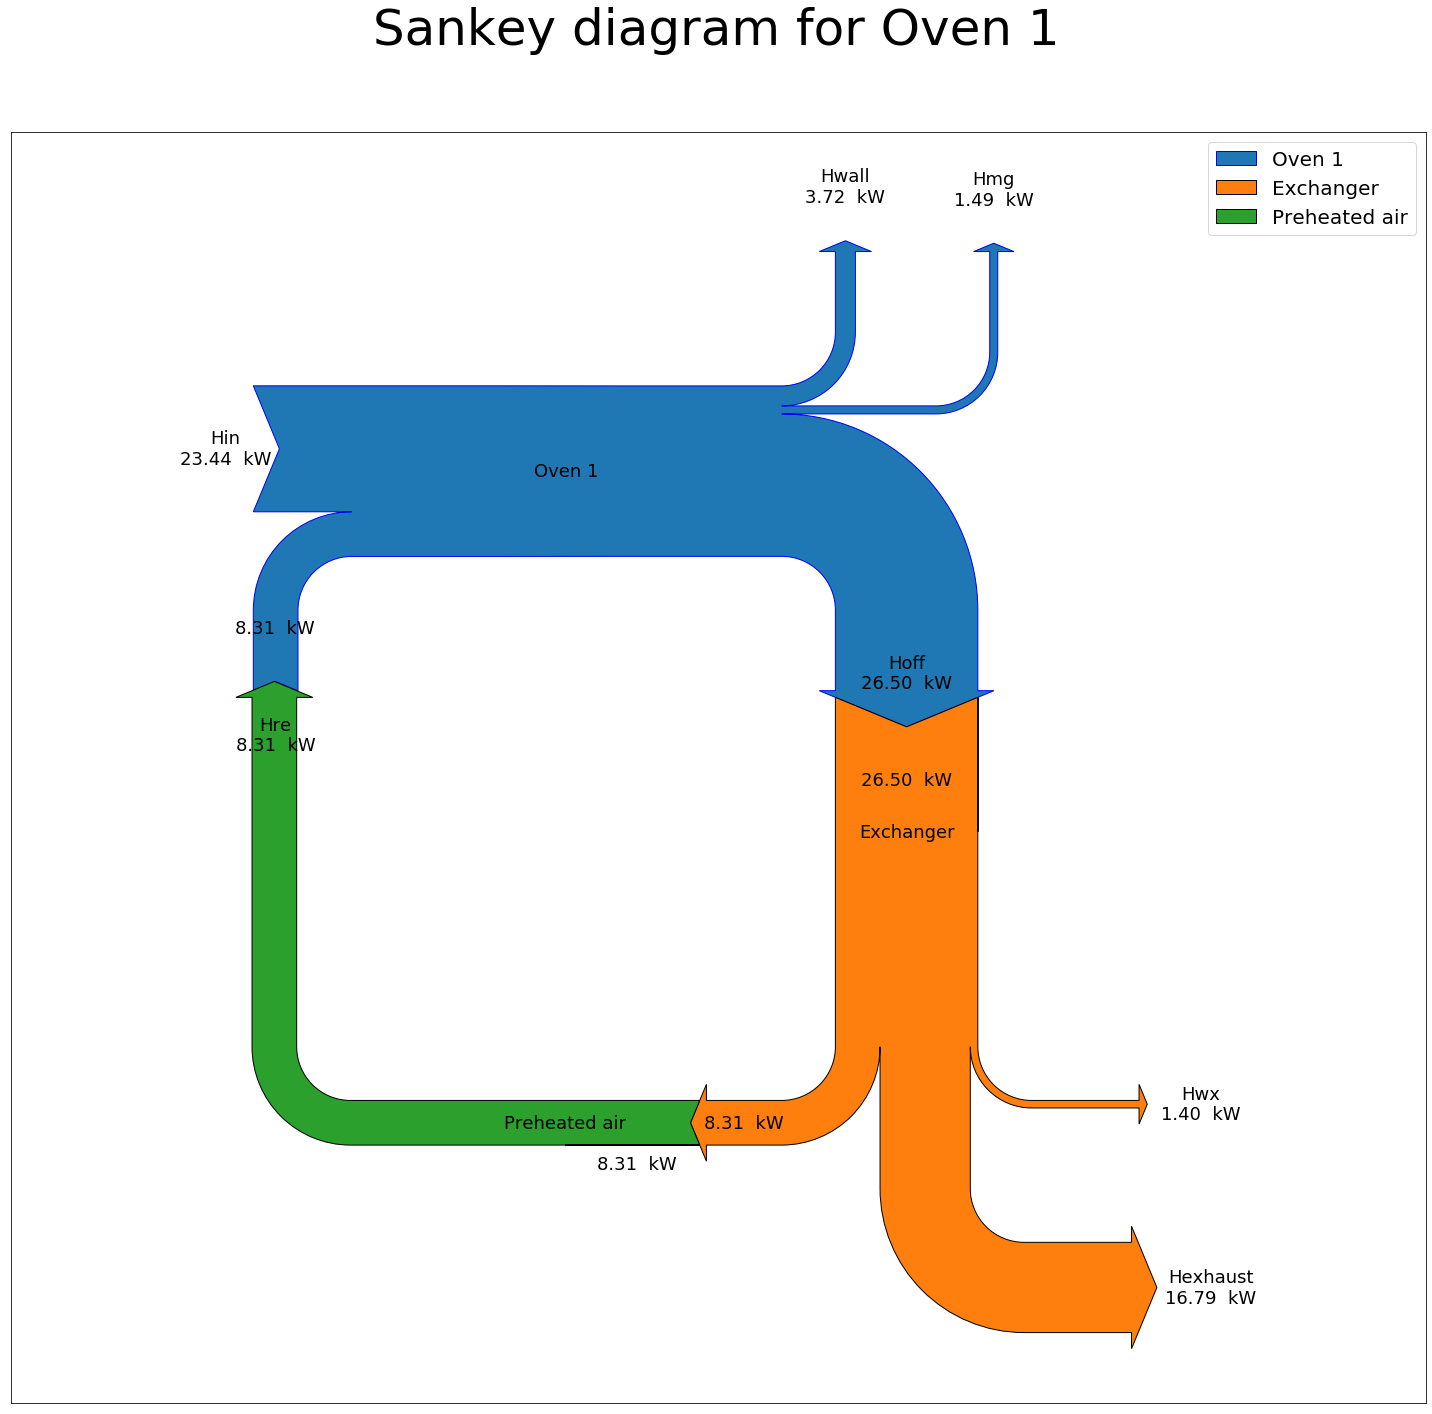

In [13]:
fig = plt.figure(figsize=(20,20))
#ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Sankey diagram for Oven 1", fontsize=18)
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])

sankey = Sankey(ax=ax, scale=0.01, format='%.2f', offset=0.1, unit='  kW', head_angle=135)

sankey.add(flows= [Hin_oven1,Heat_re,-Heat_Wall3,-Heat_Wall4,-Heat_off], label='Oven 1',
           orientations=[0,-1,1,1,-1], patchlabel='Oven 1',labels=['Hin','Hre','Hwall',
                                                                               'Hmg',''],color='b')

sankey.add(flows=[Heat_off,-Heat_wx,-Heat_re,-Heat_exhaust], label='Exchanger', 
          orientations=[0, 1, -1, 1], patchlabel='Exchanger',pathlengths=[0,.3,.24,.3],labels= ['Hoff','Hwx'
                                                                            ,'\n\n\n','Hexhaust'],
                                                                             prior=0, connect=(4, 0))

sankey.add(flows=[Heat_re,-Heat_re], label='Preheated air',
          orientations=[0, -1], patchlabel='Preheated air', pathlengths=[0,.75], prior=1, connect=(2, 0))



fig.suptitle( "Sankey diagram for Oven 1", fontsize=50)
diagrams = sankey.finish()

#diagrams[0].patch.set_color([1,0.5,.5,1])

for flechita in diagrams:
    flechita.text.set_fontsize(18)

    for t in flechita.texts:
        t.set_fontsize(18)
        

#diagrams[0].patch.set_color
#diagrams[1].patch.set_color([.5,1,.5,1])
#diagrams[2].patch.set_color([.8,.6,.5,1])
#plt.savefig("jikmdd.jpg")
plt.tight_layout( rect=[0,0,1,0.9] )
plt.legend(fontsize=20)

## Heat balance for the oven 2

![title](formulas/oven2.png)

### Heat released by propane

In [14]:
Hin_oven2=39.56
print('Hin_oven2=',"%.4f"% Hin_oven2 ,'kW')

Hin_oven2= 39.5600 kW


### Air flow

![title](formulas/volumetrico1.png)

In [15]:
p_atm=101.325 # Atmospheric pressure of furnace's location kPa PENDING
R_air= 0.287 # kPa m^3/ kg K
T_freshair= 25+273 # K
d_air2= p_atm/(R_air*(T_freshair)) # kg/m^3
print ('density of air=',"%.4f"% d_air2 ,'kg/m^3')

density of air= 1.1847 kg/m^3


In [16]:
import numpy as np
pi=np.pi
Ac2= (pi*((1.5)*.0254)**2)/4 #m^2
print ('Transversal area of the tube=',"%.4f"% Ac2 ,'m^2')

Transversal area of the tube= 0.0011 m^2


In [17]:
h= 7*.0254 #pulg-->m INVENTED VALUE
Vel_air2=((2*9.81*h*1000)/d_air2)**.5 # m/s
print ('Velocity of air=',"%.4f"% Vel_air2 ,'m/s')
Vflow2= (Vel_air2)*(Ac2) #m^3/s
print ('Air volumetric flow=',"%.4f"% Vflow2 ,'m^3/s')
print ('Air volumetric flow=',"%.4f"% float(Vflow2*3600) ,'m^3/h')

Velocity of air= 54.2633 m/s
Air volumetric flow= 0.0619 m^3/s
Air volumetric flow= 222.7145 m^3/h


### Heat recovered by the exchanger "Hre"

![title](formulas/hrepoints2.png)

![title](formulas/hre12.png)

In [18]:
Patm= 101.325 # Atmospheric pressure of furnace's location kPa PENDING
R_air= 0.287 # kPa m^3/ kg K
T_freshair= 25+273 # K
Cp_re= 1.007  # Cp@25°C kJ/kg*K
T_preheatedair2= 165+273   # Temperature of heated air MEASURED
T_average_re2=(T_freshair+T_preheatedair2)/2 # K
Heat_re2= (Patm/(R_air*T_average_re2))*Vflow2*Cp_re*(T_preheatedair2-T_freshair)
print('Hre=',"%.4f"% Heat_re2, 'kW')

Hre= 8.3674 kW


### Heat lost by the exhaust air in the beginning of the stack "Hoff"

![title](formulas/exhaust2.png)

![title](formulas/hoff11.png)

In [19]:
Cp_off2= 1.184  #Cp@1000°C kJ/kg*K
T_insideoven2= 1100+273  # Temperature of exhaust air INVENTED
T_average_off2=(T_insideoven2+T_freshair)/2 # K
Heat_off2= (Patm/(R_air*T_average_off2))*Vflow2*Cp_off2*(T_insideoven2-T_freshair)
print('Hoff= ', "%.4f"%Heat_off2, 'kW')

Hoff=  33.2732 kW


### Heat lost by the exhaust air in the end of the stack "Hexhaust"

![title](formulas/exhaust21.png)

![title](formulas/hexhaust11.png)

In [20]:
Cp_exhaust2= 1.093  #Cp@500°C kJ/kg*K
T_exhaust2= 550+273  # Temperature of exhaust air MEASURED
T_average_exhaust2=(T_exhaust2+T_freshair)/2 # K
Heat_exhaust2= (Patm/(R_air*T_average_exhaust2))*Vflow2*Cp_exhaust2*(T_exhaust2-T_freshair)
print('Hexhaust= ',"%.4f"% Heat_exhaust2, 'kW')

Hexhaust=  22.3607 kW


### Heat lost through the stack's walls "Hwx"

![title](formulas/hoff12.png)

![title](formulas/wstack1.png)

In [21]:
Heat_wx2= Heat_off2-Heat_re2-Heat_exhaust2
print('Hwx= ',"%.4f"% Heat_wx2, 'kW')

Hwx=  2.5451 kW


### Heat lost by the walls in contact with the air inside the oven

![title](formulas/walloven2.png)

In [22]:
Kfc= .30 # W/m*K SEARCHING IN THE WEB
Klr= 1.05 # W/m*K SEARCHING IN THE WEB
Kac= 58 # W/m*K SEARCHING IN HE WEB
Tsi1=1700 #INVENTED
Tso1=140 #MEASURED
Tsi2=1700 #INVENTED
Tso2=140 #MEASURED
Tsi3=1700 #INVENTED
Tso3=140 #MEASURED
Tsi4=1700 #INVENTED
Tso4=140 #MEASURED
A1=24*24*fc
A2=24*45.5*fc
A3=24*45.5*fc
A4=24*45.5*fc
Heat_Wall= (((Tsi1-Tso1)/(2/(Kfc*A1)+2/(Kfc*A1))+(Tsi2-Tso2)/(9/(Klr*A2)+2.5/(Kfc*A2)+4/(Kac*A2)) \
        +(Tsi3-Tso3)/(9/(Klr*A3)+2.5/(Kfc*A3)+4/(Kac*A3))+(Tsi4-Tso4)/(9/(Klr*A4)+2.5/(Kfc*A4)+4/(Kac*A4)))*(1/.0254))/1000
print(Heat_Wall, 'kW')



9.359353628480218 kW


### Heat lost by the walls in contact with the melted glass inside the oven

![title](formulas/mgoven2.png)

In [23]:
# lost heat by oven 2 in contact with the melted glass
Tsi=1300 #THIS VALUE WAS GIVEN
Tso5=130 #MEASURED
Tso6=130 #MEASURED
Tso7=130 #MEASURED
Tso8=130 #MEASURED
A5=24*12*fc
A6=24*12*fc
A7=24*12*fc
A8=24*24*fc
Heat_Wall2= (((Tsi-Tso5)/(9/(Klr*A5)+2.5/(Kfc*A5)+4/(Kac*A5))+(Tsi-Tso6)/(9/(Klr*A6)+2.5/(Kfc*A6)+4/(Kac*A6)) \
        +(Tsi-Tso7)/(9/(Klr*A7)+2.5/(Kfc*A7)+4/(Kac*A7))+(Tsi-Tso8)/(2.5/(Klr*A8)+1/(Kfc*A8)))*(1/.0254))/1000

print(Heat_Wall2, 'kW')


4.508285860578504 kW


In [24]:
Heat_Wall+Heat_Wall2+Heat_off2-Hin_oven2-Heat_re2

-0.7865697243634635

## Sankey diagrams

In [25]:
#%matplotlib notebook
import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey

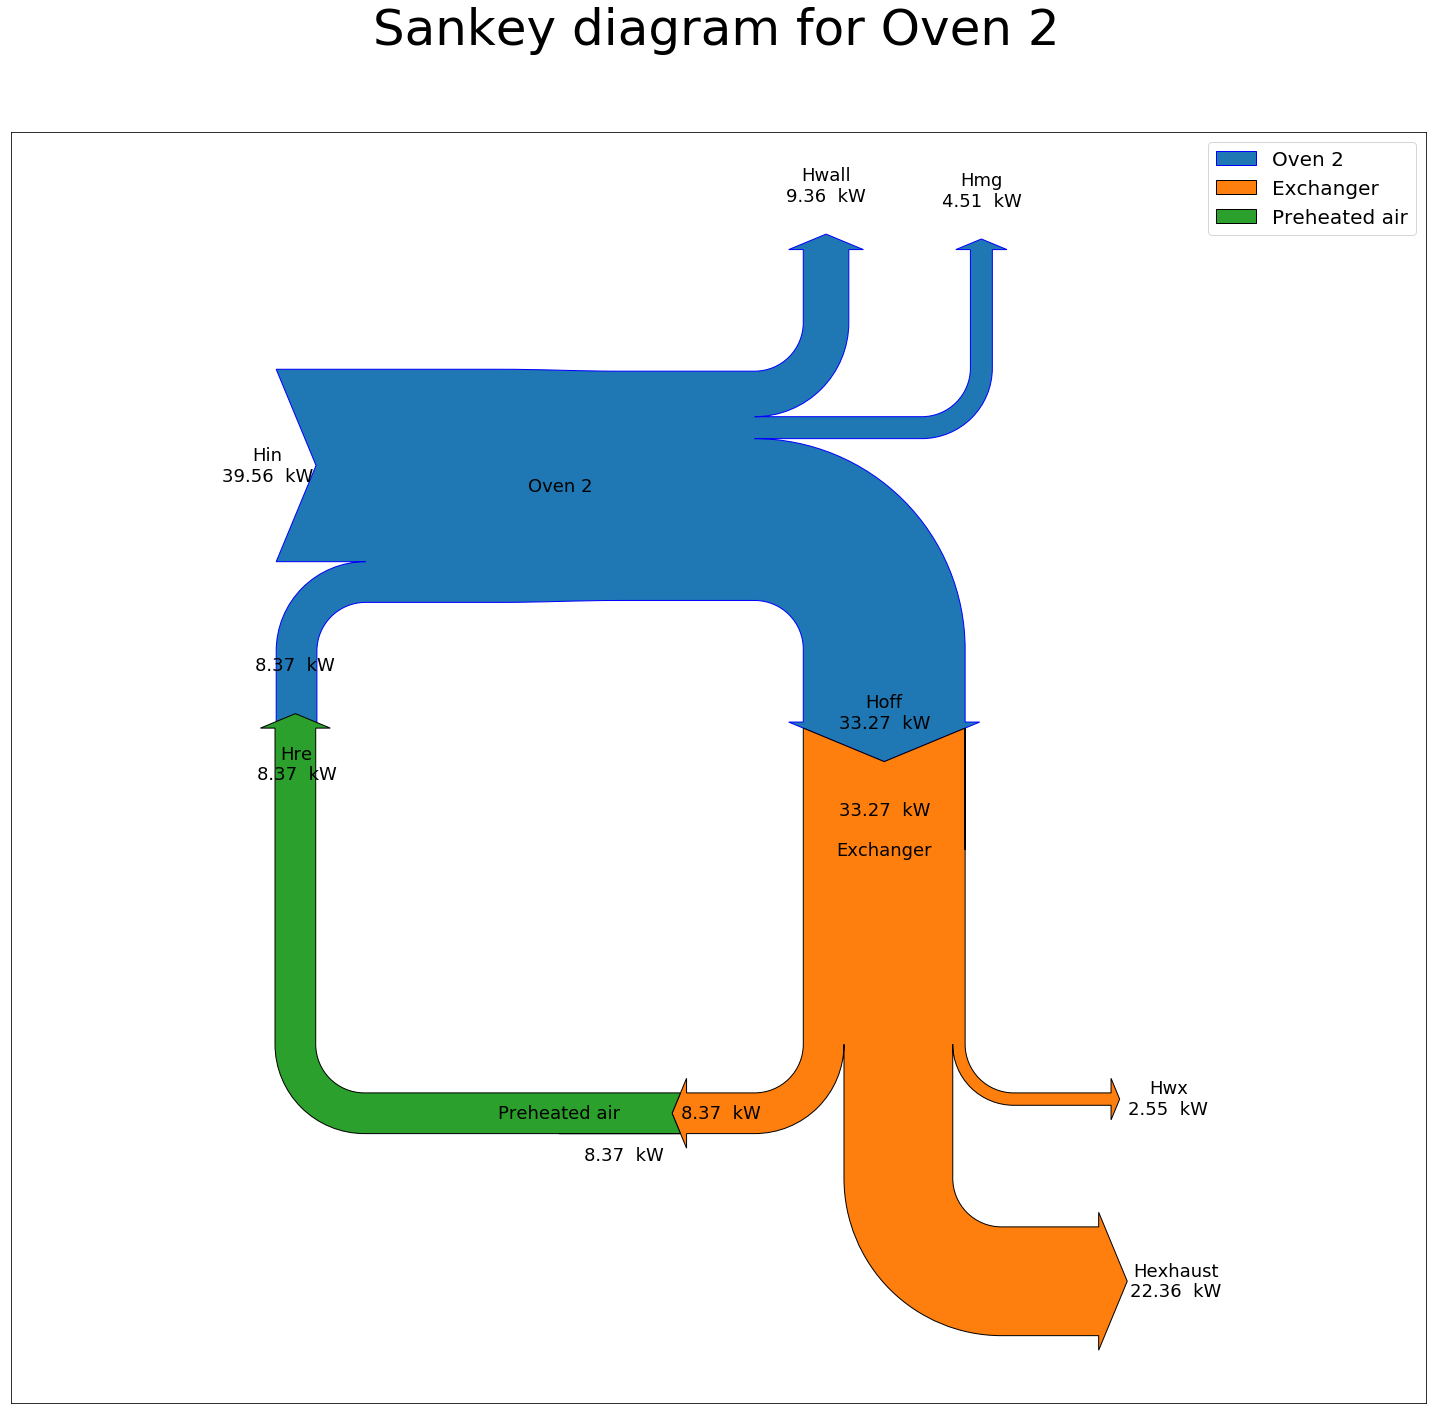

In [26]:
fig = plt.figure(figsize=(20,20))
#ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Sankey diagram for Oven 1", fontsize=18)
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])

sankey = Sankey(ax=ax, scale=0.01, format='%.2f', offset=0.1, unit='  kW', head_angle=135)

sankey.add(flows= [Hin_oven2,Heat_re2,-Heat_Wall,-Heat_Wall2,-Heat_off2], label='Oven 2',
           orientations=[0,-1,1,1,-1], patchlabel='Oven 2',labels=['Hin','Hre','Hwall',
                                                                               'Hmg',''],color='b')

sankey.add(flows=[Heat_off2,-Heat_wx2,-Heat_re2,-Heat_exhaust2], label='Exchanger', 
          orientations=[0, 1, -1, 1], patchlabel='Exchanger',pathlengths=[0,.3,.24,.3],labels= ['Hoff','Hwx'
                                                                            ,'\n\n\n','Hexhaust'],
                                                                             prior=0, connect=(4, 0))

sankey.add(flows=[Heat_re2,-Heat_re2], label='Preheated air',
          orientations=[0, -1], patchlabel='Preheated air', pathlengths=[0,.75], prior=1, connect=(2, 0))



fig.suptitle( "Sankey diagram for Oven 2", fontsize=50)
diagrams = sankey.finish()

#diagrams[0].patch.set_color([1,0.5,.5,1])

for flechita in diagrams:
    flechita.text.set_fontsize(18)

    for t in flechita.texts:
        t.set_fontsize(18)
        

#diagrams[0].patch.set_color
#diagrams[1].patch.set_color([.5,1,.5,1])
#diagrams[2].patch.set_color([.8,.6,.5,1])
#plt.savefig("jikmdd.jpg")
plt.tight_layout( rect=[0,0,1,0.9] )
plt.legend(fontsize=20)